In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-200-spotify-european-song-and-weather-data/final_spotify.csv


# Unfortunately, it seems that a description of the dataset in the original page leads to a 404, leaving us to guess the meaning of some features


In [6]:
#Let's first read the data
df = pd.read_csv("/kaggle/input/top-200-spotify-european-song-and-weather-data/final_spotify.csv", index_col=0)
df

,region,date,month,spotify_id,artist,track_name,position,streams,danceability,energy,...,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
0,AUT,2019-01-02,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35174,0.78,0.69,...,0.48,100.08,0.26,1.0,-5,1,1,48,69,1
1,AUT,2019-01-03,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,34237,0.78,0.69,...,0.48,100.08,0.26,1.0,-3,1,1,91,70,1
2,AUT,2019-01-04,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35199,0.78,0.69,...,0.48,100.08,0.26,1.0,-2,0,0,14,75,1
3,AUT,2019-01-05,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,32559,0.78,0.69,...,0.48,100.08,0.26,1.0,0,0,0,47,80,1
4,AUT,2019-01-06,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,26956,0.78,0.69,...,0.48,100.08,0.26,1.0,0,1,0,80,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437643,SVK,2019-12-24,12,5mdNRmqCc8052dYppz1RQn,Jaromír Vomáčka,Veselé Vánoce,199,1973,0.80,0.69,...,0.82,125.82,0.80,0.0,6,1,0,84,82,1
1437644,SVK,2019-12-25,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,137,1396,0.91,0.71,...,0.17,91.00,0.78,1.0,4,1,0,96,89,1
1437645,SVK,2019-12-26,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,196,1200,0.91,0.71,...,0.17,91.00,0.78,1.0,4,1,0,91,79,1
1437646,SVK,2019-12-31,12,5SZn6pPcWotYJ9NxEElWbS,Karol Duchoň,Čardáš dvoch,131,1680,0.41,0.86,...,0.09,146.47,0.37,0.0,4,1,0,90,88,1


In [7]:
# I want to see all columns to try to interpret them, for this we have to set an option
pd.set_option('display.max_columns', None)

In [8]:
df
#cells name: region	date	month	spotify_id	artist	track_name	position	streams	danceability	
#energy	instrumentalness	key	liveness	loudness	speechiness	acousticness	tempo	
#valence	explicit	temp	rain	snow	cloud	humidity	const


,region,date,month,spotify_id,artist,track_name,position,streams,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
0,AUT,2019-01-02,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35174,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-5,1,1,48,69,1
1,AUT,2019-01-03,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,34237,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-3,1,1,91,70,1
2,AUT,2019-01-04,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35199,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-2,0,0,14,75,1
3,AUT,2019-01-05,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,32559,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,0,0,47,80,1
4,AUT,2019-01-06,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,26956,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,1,0,80,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437643,SVK,2019-12-24,12,5mdNRmqCc8052dYppz1RQn,Jaromír Vomáčka,Veselé Vánoce,199,1973,0.80,0.69,0.0,5.0,0.33,-4.43,0.04,0.82,125.82,0.80,0.0,6,1,0,84,82,1
1437644,SVK,2019-12-25,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,137,1396,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,96,89,1
1437645,SVK,2019-12-26,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,196,1200,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,91,79,1
1437646,SVK,2019-12-31,12,5SZn6pPcWotYJ9NxEElWbS,Karol Duchoň,Čardáš dvoch,131,1680,0.41,0.86,0.0,11.0,0.20,-6.33,0.12,0.09,146.47,0.37,0.0,4,1,0,90,88,1


# A lot of important features are not described properly by the dataset original author; here is a better compressed list:

**region**: country

**date**: data in year-month-day

**month**: month of the year in numerical

**spotify_id**: string of characters that represents a musician's profile page on spotify

**artist**: artist name
track_name: name of the song

**position**: not sure, could be the track position ?

**stream**: not sure, number of streams in thousands?

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0

**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Range: -1 - 11

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**explicit**: 1 if contains profanity, 0 otherwise

**const**: ????

weather related tags are self explanatory. Since it is Europe assuming the weather is in Celsius and humidity is in %

found this api reference: https://developer.spotify.com/documentation/web-api/reference/get-audio-features


The data overall seems pretty clean, no need to further refine it.
We could however, remove date, it seems to specific to make any assumptions about;
unamed is just the row number;
and const we dont know what it is so we can also remove it


In [9]:
#removing the previously mentioned features:
df.drop(columns=['date', 'const'])

#error happens if you run this cell twice since features are already removed and thus not found 

,region,month,spotify_id,artist,track_name,position,streams,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity
0,AUT,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35174,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-5,1,1,48,69
1,AUT,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,34237,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-3,1,1,91,70
2,AUT,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35199,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-2,0,0,14,75
3,AUT,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,32559,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,0,0,47,80
4,AUT,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,26956,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,1,0,80,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437643,SVK,12,5mdNRmqCc8052dYppz1RQn,Jaromír Vomáčka,Veselé Vánoce,199,1973,0.80,0.69,0.0,5.0,0.33,-4.43,0.04,0.82,125.82,0.80,0.0,6,1,0,84,82
1437644,SVK,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,137,1396,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,96,89
1437645,SVK,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,196,1200,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,91,79
1437646,SVK,12,5SZn6pPcWotYJ9NxEElWbS,Karol Duchoň,Čardáš dvoch,131,1680,0.41,0.86,0.0,11.0,0.20,-6.33,0.12,0.09,146.47,0.37,0.0,4,1,0,90,88


In [10]:
df

#later i will probably need the dataset with only the numbers
numeric_df = df.select_dtypes(include='number') 
numeric_df

,month,position,streams,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
0,1,1,35174,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-5,1,1,48,69,1
1,1,1,34237,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-3,1,1,91,70,1
2,1,1,35199,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-2,0,0,14,75,1
3,1,1,32559,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,0,0,47,80,1
4,1,1,26956,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,1,0,80,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437643,12,199,1973,0.80,0.69,0.0,5.0,0.33,-4.43,0.04,0.82,125.82,0.80,0.0,6,1,0,84,82,1
1437644,12,137,1396,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,96,89,1
1437645,12,196,1200,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,91,79,1
1437646,12,131,1680,0.41,0.86,0.0,11.0,0.20,-6.33,0.12,0.09,146.47,0.37,0.0,4,1,0,90,88,1


In [11]:
#Noticed in fact that are a few rows with NAN values which can be problematic. In this case, since there are only two rows
#with NAN, i will just drop them. If there were more i would have to use an imputation technique
num_rows_with_nan = numeric_df.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

numeric_df = numeric_df.dropna(axis=0)
numeric_df


Number of rows with NaN values: 2


,month,position,streams,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
0,1,1,35174,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-5,1,1,48,69,1
1,1,1,34237,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-3,1,1,91,70,1
2,1,1,35199,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-2,0,0,14,75,1
3,1,1,32559,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,0,0,47,80,1
4,1,1,26956,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,1,0,80,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437643,12,199,1973,0.80,0.69,0.0,5.0,0.33,-4.43,0.04,0.82,125.82,0.80,0.0,6,1,0,84,82,1
1437644,12,137,1396,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,96,89,1
1437645,12,196,1200,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,91,79,1
1437646,12,131,1680,0.41,0.86,0.0,11.0,0.20,-6.33,0.12,0.09,146.47,0.37,0.0,4,1,0,90,88,1


# Let's start with some EDA, just making plots

In [12]:
#I first want to see if there is a correlation between specific types of music and current season

month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

#adding a column called season to the df
df['season'] = df['month'].map(month_to_season)

df

,region,date,month,spotify_id,artist,track_name,position,streams,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const,season
0,AUT,2019-01-02,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35174,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-5,1,1,48,69,1,Winter
1,AUT,2019-01-03,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,34237,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-3,1,1,91,70,1,Winter
2,AUT,2019-01-04,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35199,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,-2,0,0,14,75,1,Winter
3,AUT,2019-01-05,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,32559,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,0,0,47,80,1,Winter
4,AUT,2019-01-06,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,26956,0.78,0.69,0.0,10.0,0.12,-6.16,0.33,0.48,100.08,0.26,1.0,0,1,0,80,74,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437643,SVK,2019-12-24,12,5mdNRmqCc8052dYppz1RQn,Jaromír Vomáčka,Veselé Vánoce,199,1973,0.80,0.69,0.0,5.0,0.33,-4.43,0.04,0.82,125.82,0.80,0.0,6,1,0,84,82,1,Winter
1437644,SVK,2019-12-25,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,137,1396,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,96,89,1,Winter
1437645,SVK,2019-12-26,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,196,1200,0.91,0.71,0.0,11.0,0.16,-6.11,0.25,0.17,91.00,0.78,1.0,4,1,0,91,79,1,Winter
1437646,SVK,2019-12-31,12,5SZn6pPcWotYJ9NxEElWbS,Karol Duchoň,Čardáš dvoch,131,1680,0.41,0.86,0.0,11.0,0.20,-6.33,0.12,0.09,146.47,0.37,0.0,4,1,0,90,88,1,Winter


I wonder if there are any correlations between seasons and the general happiness of songs listened to. Valence describes this perfectly

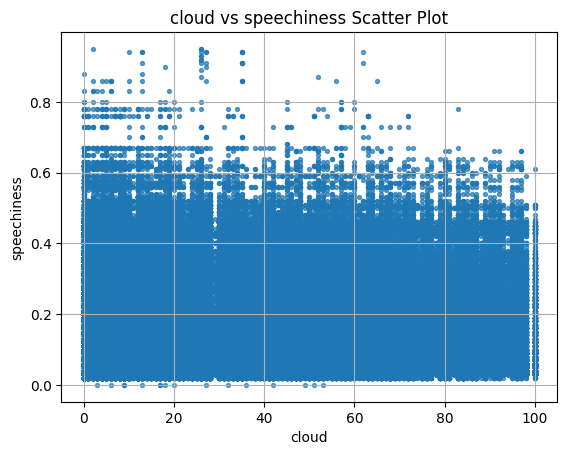

In [13]:
# All of the below scatter plots have something interesting about them. I tried selecting a temperature-related
#variable and a music related variable to take the most out of the dataset

plt.scatter(df['cloud'], df['speechiness'], s=8, alpha=0.7)
#plt.scatter(df['temp'], df['valence'], s=2, alpha=0.7, color = 'orange') #curiously enough, temperature does not affect how happy the song people listen to is
#plt.scatter(df['temp'], df['danceability'], s=8, alpha=0.7)
#plt.scatter(df['energy'], df['danceability'], s=8, alpha=0.7)# good correlation between energy and danceability
#plt.scatter(df['instrumentalness'], df['snow'], s=8, alpha=0.7) #better an histogram
plt.xlabel('cloud')
plt.ylabel('speechiness')
plt.title('cloud vs speechiness Scatter Plot')
plt.savefig('ScatterPlot.png')
plt.grid()
plt.show()

**Box plot for the temperature vs valence**

In [ ]:
plt.figure(figsize=(24, 8))
sns.violinplot(x=df['temp'], y=df['valence'], palette="coolwarm") #curiously enough, temperature does not affect how happy the song people listen to is
#plt.scatter(df['temp'], df['danceability'], s=8, alpha=0.7)
#plt.scatter(df['energy'], df['danceability'], s=8, alpha=0.7)# good correlation between energy and danceability
#plt.scatter(df['instrumentalness'], df['snow'], s=8, alpha=0.7) #better an histogram
plt.xlabel('Temperature')
plt.ylabel('Valence')
plt.title('Temperature vs Valence Scatter Plot')
plt.savefig('ViolinPlot.png')
plt.grid()
plt.show()


##plt.figure(figsize=(18, 10))
#sns.boxplot(x=df['temp'], y=df['danceability'], palette="coolwarm")
# plt.xlabel('Temperature')
# plt.ylabel('Liveness')
# plt.title('Temperature vs Liveness')
# plt.xticks(rotation=45)
# plt.savefig('Boxplot.png')

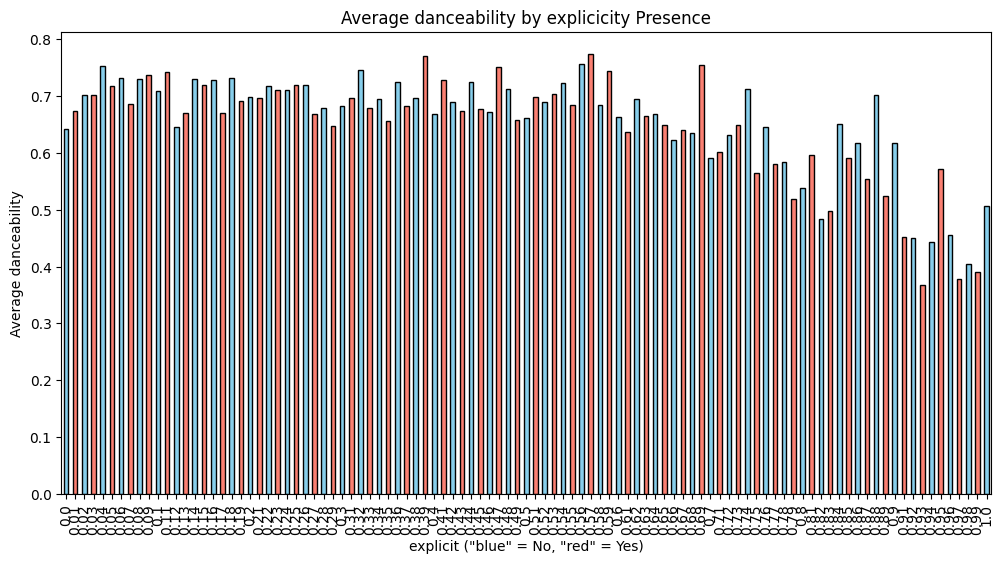

In [15]:

#mean_values = df.groupby('explicit')['danceability'].mean()
mean_values = df.groupby('acousticness')['danceability'].mean() # good but too much info
#mean_values = df.groupby('temp')['danceability'].mean()
plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel('explicit ("blue" = No, "red" = Yes)')
plt.ylabel('Average danceability')
plt.title('Average danceability by explicicity Presence')
plt.savefig('BarGraph.png')
plt.show()



# Let's try plot some boxplots as well



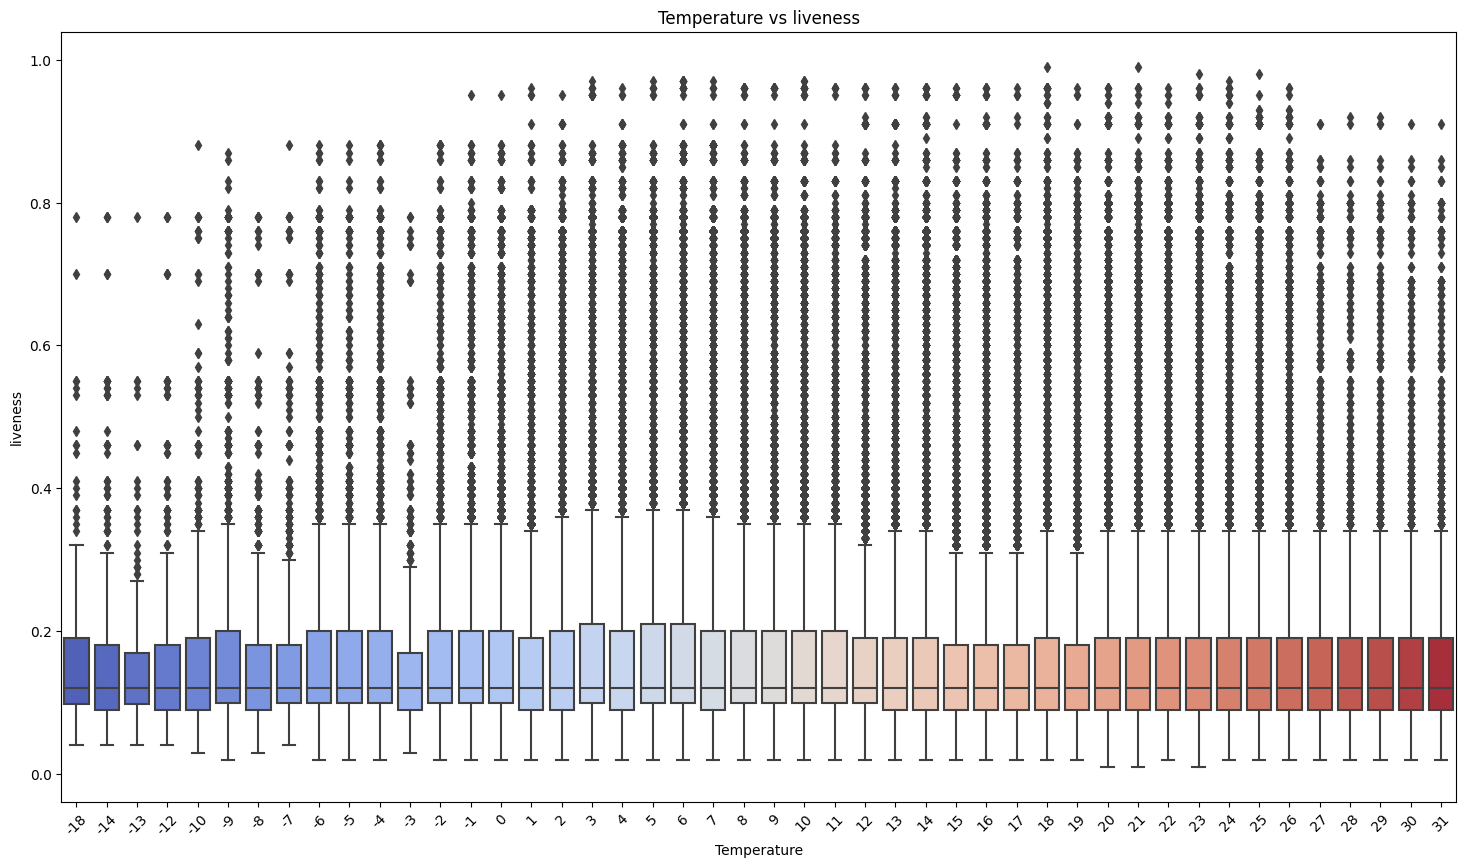

In [17]:
plt.figure(figsize=(18, 10))
#sns.boxplot(x=df['temp'], y=df['danceability'], palette="coolwarm")
#sns.boxplot(x=df['snow'], y=df['speechiness'], palette="coolwarm") # if snow, less speechiness
#sns.boxplot(x=df['snow'], y=df['loudness'], palette="coolwarm") # if snow, louder
sns.boxplot(x=df['temp'], y=df['liveness'], palette="coolwarm") # less temp, less live performances
plt.xlabel('Temperature')
plt.ylabel('liveness')
plt.title('Temperature vs liveness')
plt.xticks(rotation=45)
plt.savefig('Boxplot.png')
plt.show()

# WARNING: DO NOT RECOMMEND RUNNING THIS CELL

Then I remembered that seaborn has a cool little function that makes a scatter plot for every combination of variables! thus we dont have to make all of them individually and can get a better view of all the relations between the features!

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

#took around 15/20 min and it resulted in a bunch of small useless scatter plots. to zoom in simply double click 
#on part of the image, dont recommend running this cell

# I have explored the data a bit by making some scatter plots, now i need more precision. To see which relationships to investigate i can view a correlation matrix 

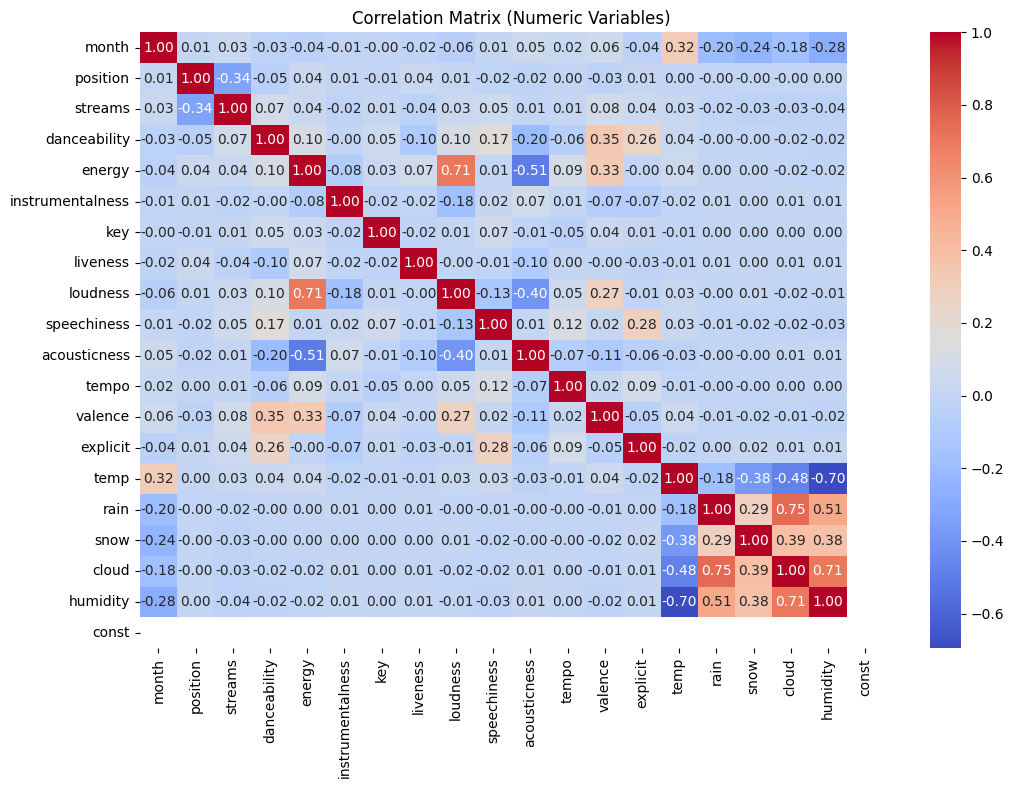

In [31]:
#let's now make a correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Variables)')
plt.savefig('Heatmap.png')
plt.show()

# Now let's code some ML algorithims to how we can predict a song's position. Assuming position means the track's position of course

In [ ]:
#Setting the base features:
X = numeric_df[['month', 'streams', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
        'speechiness', 'acousticness', 'tempo', 'valence', 'explicit', 'temp', 'rain', 'snow', 'cloud', 'humidity']] 

#Setting the target features:
y = numeric_df['position']  # Replace with your target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#model creation
model = LinearRegression()

#training the model with our split
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#For linear regression, we should use mse and r squared
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")

R squared of 0.12 means that this Linear regression is only able to explain 12% of the variability of the target variable which is very low indeed

# Lets now go for decision tree

In [ ]:
modelDecisionTree = DecisionTreeRegressor(random_state=42)

modelDecisionTree.fit(X_train, y_train)

y_pred = modelDecisionTree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r_squared = modelDecisionTree.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")

Much better performance now ! 

# WARNING: TAKES 40-60 MIN

# let's keep going with random forest. 

In [ ]:
modelRandomForest = RandomForestRegressor(n_estimators=100, random_state=42)

modelRandomForest.fit(X_train, y_train)

y_pred = modelRandomForest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r_squared = modelRandomForest.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")